In [79]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [80]:
freq = 3648

df_tensoes = pd.read_csv(f'data{str(freq)}_pc_RLC0.csv')
df_tensoes.columns = ['Time(s)', 'VG', 'VC']
df_tensoes['VR'] = df_tensoes['VG'] - df_tensoes['VC']

time_data = df_tensoes['Time(s)'].values
VG_data = df_tensoes['VG'].values
VC_data = df_tensoes['VC'].values
VR_data = df_tensoes['VR'].values

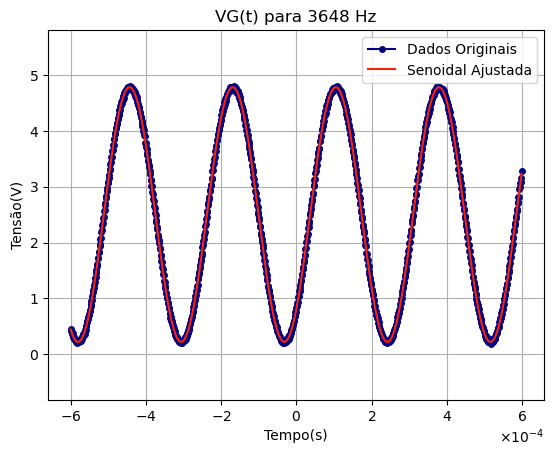

VGoffset: 2.5, VG0: 2.28, VGOmega: 2.5, VGPhi: -0.83

A senoidal ajustada é: 2.28 * sin(2.5 * t + -0.83) + 2.5


In [81]:
def senoidal(t, VGoffset, VG0, VGomega, VGphi):
    return VG0 * np.sin(VGomega * t + VGphi) + VGoffset

initial_guess = [2.3, 2.5, 2 * np.pi * (freq), 0]

params, params_covariance = curve_fit(senoidal, time_data, VG_data, p0=initial_guess)

plt.plot(time_data, VG_data, label='Dados Originais', color='navy', marker = '.', markersize=8)

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_major_formatter().set_scientific(True)
plt.gca().xaxis.get_major_formatter().set_powerlimits((-1,1))

plt.plot(time_data, senoidal(time_data, *params), label='Senoidal Ajustada', color='#FF2400')

plt.title(f'VG(t) para {freq} Hz')
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão(V)')
plt.legend(loc='upper right')
plt.grid()
plt.ylim(VG_data.min() - 1, VG_data.max() + 1)
plt.show()

VGoffset, VG0, VGomega, VGphi = params
print(f'VGoffset: {np.round(VGoffset, 2)}, VG0: {np.round(VG0, 2)}, VGOmega: {np.round(VGoffset, 2)}, VGPhi: {np.round(VGphi, 2)}\n')
print(f'A senoidal ajustada é: {np.round(VG0, 2)} * sin({np.round(VGoffset, 2)} * t + {np.round(VGphi, 2)}) + {np.round(VGoffset, 2)}')

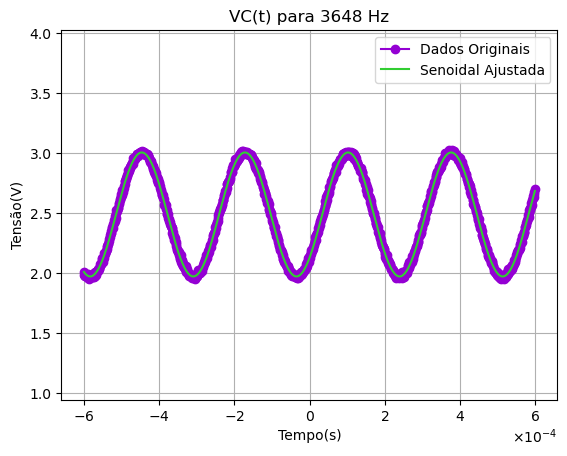

VCoffset: 2.49, VC0: 0.52, VCOmega: 22916.88, VCPhi: -0.77

A senoidal ajustada é: 0.52 * sin(2.49 * t + -0.77) + 2.49


In [82]:
def senoidal(t, VCoffset, VC0, VComega, VCphi):
    return VC0 * np.sin(VComega * t + VCphi) + VCoffset

initial_guess = [2.3, 2.5, 2 * np.pi * (freq), 0]

params, params_covariance = curve_fit(senoidal, time_data, VC_data, p0=initial_guess)

plt.plot(time_data, VC_data, label='Dados Originais', color='darkviolet', marker = 'o')

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_major_formatter().set_scientific(True)
plt.gca().xaxis.get_major_formatter().set_powerlimits((-1,1))

plt.plot(time_data, senoidal(time_data, *params), label='Senoidal Ajustada', color='limegreen')

plt.title(f'VC(t) para {freq} Hz')
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão(V)')
plt.legend(loc='upper right')
plt.ylim(VC_data.min() - 1, VC_data.max() + 1)
plt.grid()
plt.show()

VCoffset, VC0, VComega, VCphi = params
print(f'VCoffset: {np.round(VCoffset, 2)}, VC0: {np.round(VC0, 2)}, VCOmega: {np.round(VComega, 2)}, VCPhi: {np.round(VCphi, 2)}\n')
print(f'A senoidal ajustada é: {np.round(VC0, 2)} * sin({np.round(VCoffset, 2)} * t + {np.round(VCphi, 2)}) + {np.round(VCoffset, 2)}')

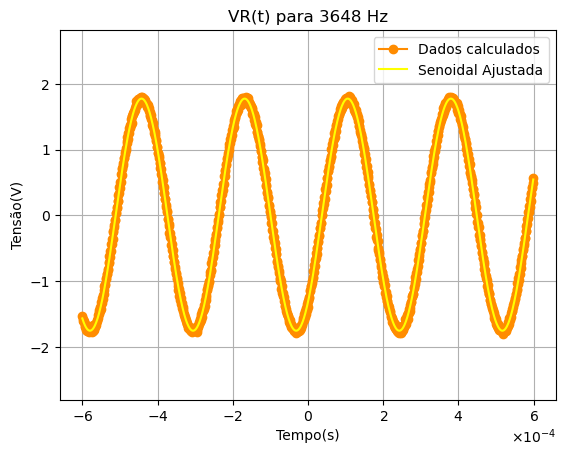

VRoffset: 0.01, VR0: 1.76, VROmega: 22919.76, VRPhi: -0.85

A senoidal ajustada é: 1.76 * sin(0.01 * t + -0.85) + 0.01


In [83]:
def senoidal(t, VRoffset, VR0, VRomega, VRphi):
    return VR0 * np.sin(VRomega * t + VRphi) + VRoffset

initial_guess = [2.3, 2.5, 2 * np.pi * (freq), 0]

params, params_covariance = curve_fit(senoidal, time_data, VR_data, p0=initial_guess)

plt.plot(time_data, VR_data, label='Dados calculados', color='darkorange', marker = 'o')

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_major_formatter().set_scientific(True)
plt.gca().xaxis.get_major_formatter().set_powerlimits((-1,1))

plt.plot(time_data, senoidal(time_data, *params), label='Senoidal Ajustada', color='yellow')

VRoffset, VR0, VRomega, VRphi = params

plt.title(f'VR(t) para {freq} Hz')
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão(V)')
plt.legend(loc='upper right')
plt.ylim(VR_data.min() - 1, VR_data.max() + 1)
plt.grid()
plt.show()

print(f'VRoffset: {np.round(VRoffset, 2)}, VR0: {np.round(VR0, 2)}, VROmega: {np.round(VRomega, 2)}, VRPhi: {np.round(VRphi, 2)}\n')
print(f'A senoidal ajustada é: {np.round(VR0, 2)} * sin({np.round(VRoffset, 2)} * t + {np.round(VRphi, 2)}) + {np.round(VRoffset, 2)}')

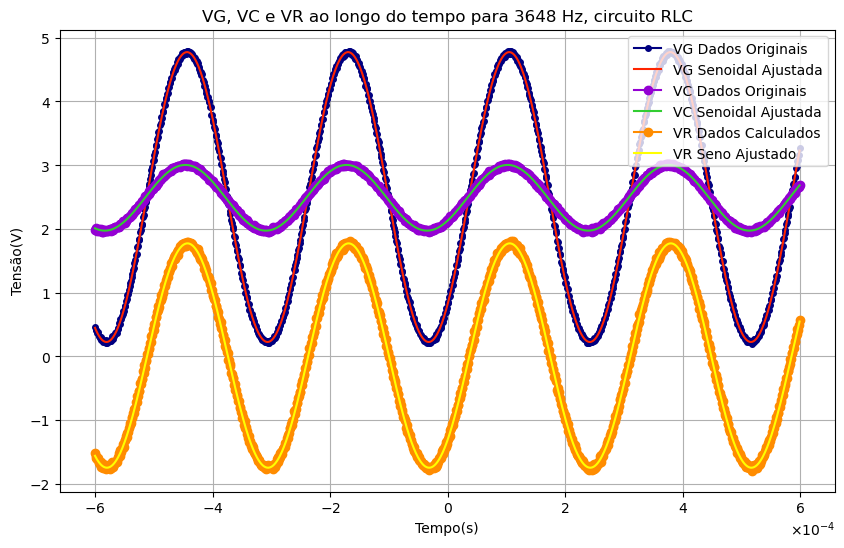

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(time_data, VG_data, label='VG Dados Originais', color='navy', marker='.', markersize=8)
plt.plot(time_data, senoidal(time_data, VGoffset, VG0, VGomega, VGphi), label='VG Senoidal Ajustada', color='#FF2400')
plt.plot(time_data, VC_data, label='VC Dados Originais', color='darkviolet', marker='o')
plt.plot(time_data, senoidal(time_data, VCoffset, VC0, VComega, VCphi), label='VC Senoidal Ajustada', color='limegreen')
plt.plot(time_data, VR_data, label='VR Dados Calculados', color='darkorange', marker='o')
plt.plot(time_data, senoidal(time_data, VRoffset, VR0, VRomega, VRphi), label='VR Seno Ajustado', color='yellow')
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_major_formatter().set_scientific(True)
plt.gca().xaxis.get_major_formatter().set_powerlimits((-1, 1))
plt.title(f'VG, VC e VR ao longo do tempo para {freq} Hz, circuito RLC')
plt.xlabel('Tempo(s)')
plt.ylabel('Tensão(V)')
plt.legend(loc='upper right')
plt.grid()
plt.show()